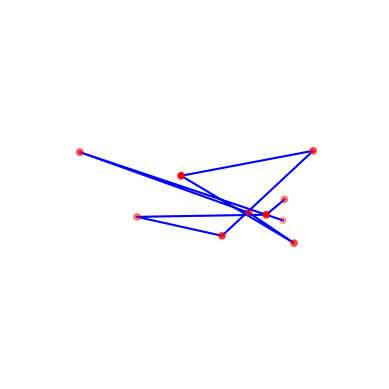

In [95]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np

# Example points in 3D
# Generate random points in 3D
points = [(random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(10)]

# Unpack the points into x, y, and z coordinates
x, y, z = zip(*points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z, c='r', marker='o')

# Connect the points with lines
ax.plot(x, y, z, color='b')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_axis_off()
plt.show()

In [139]:

# Create a new figure for 2D projection


def show(x,y,z):
    fig_2d = plt.figure()
    ax_2d = fig_2d.add_subplot(111)
    ax_2d.scatter(x, y, c='r', marker='o')


    # Annotate each point with its index
    for idx, (x_coord, y_coord) in enumerate(zip(x, y)):
        ax_2d.annotate(idx, (x_coord, y_coord), textcoords="offset points", xytext=(0,10), ha='center')

                
                
    # Calculate intersection point
    def line_intersection(A, B, C, D):
        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]
        
        xdiff = (A[0] - B[0], C[0] - D[0])
        ydiff = (A[1] - B[1], C[1] - D[1])
        
        div = det(xdiff, ydiff)
        if div == 0:
            raise Exception('Lines do not intersect')
        
        d = (det(A, B), det(C, D))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return x, y
    def calculate_z_coordinate(i, intersection_point):
            z_A = z[i]
            z_B = z[i + 1]
            if x[i] != x[i + 1]:
                return z_A + (z_B - z_A) * ((intersection_point[0] - x[i]) / (x[i + 1] - x[i]))
            else:
                return z_A + (z_B - z_A) * ((intersection_point[1] - y[i]) / (y[i + 1] - y[i]))            
    # Calculate overlapping lines and intersection points
    overlapping_lines = [[] for _ in range(len(x))]
    intersection_points = []
    for i in range(len(x) - 1):
        for j in range(len(x) - 1):
            if(i == j):
                continue
            # Check if lines (x[i], y[i]) -> (x[i + 1], y[i + 1]) and (x[j], y[j]) -> (x[j + 1], y[j + 1]) intersect
            def ccw(A, B, C):
                return (C[1] - A[1]) * (B[0] - A[0]) >= (B[1] - A[1]) * (C[0] - A[0])

            A = (x[i], y[i])
            B = (x[i + 1], y[i + 1])
            C = (x[j], y[j])
            D = (x[j + 1], y[j + 1])
            
            if ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D):
                inter = line_intersection(A,B,C,D)
                z1 = calculate_z_coordinate(i, inter)
                z2 = calculate_z_coordinate(j, inter)
                if(z1 > z2):
                    overlapping_lines[j].append(inter)
                else:
                    overlapping_lines[i].append(inter)
                

    # Highlight intersection points
    for i, l in enumerate(overlapping_lines):
        if(i == len(overlapping_lines) - 1):
            continue
        # A = (x[i], y[i])
        # B = (x[i + 1], y[i + 1])
        # C = (x[j], y[j])
        # D = (x[j + 1], y[j + 1])
        # intersection_point = line_intersection(A, B, C, D)
        start_point = (x[i], y[i])
        end_point = (x[i+1], y[i+1])
        
        if(l == []):
            # Calculate z coordinate for intersection point on some line
            ax_2d.plot([x[i], x[i+1]], [y[i], y[i+1]], color='r', linewidth=2)
        else:
            def calculate_inner_point(A, B, l):
                return (A[0] + l * (B[0] - A[0]), A[1] + l * (B[1] - A[1]))
            t01 = calculate_inner_point(start_point,l[0], 0.9)
            t02 = calculate_inner_point(l[len(l) - 1],end_point, 0.1)
            ax_2d.plot((start_point[0],t01[0]),(start_point[1], t01[1]), color='b', linewidth=2)
            for index in range(len(l) - 1):        
                t1 = calculate_inner_point(l[index], l[index + 1],0.1)
                t2 = calculate_inner_point(l[index],l[index+1], 0.9)
                ax_2d.plot((t1[0],t2[0]),(t1[1],t2[1]), color='g', linewidth=2)
                start_point = l[index]
        
            ax_2d.plot((t02[0],end_point[0]),(t02[1], end_point[1]), color='b', linewidth=2)
    ax_2d.set_xlabel('X Label')
    ax_2d.set_ylabel('Y Label')
    ax_2d.set_title('2D Projection of 3D Points')
    return ax_2d
    

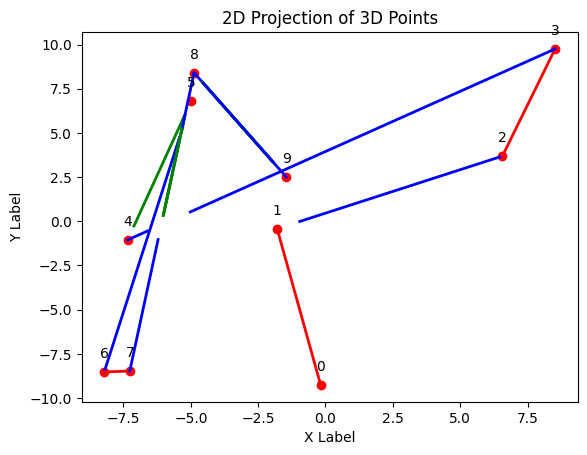

In [144]:
# Generate random points in 3D
points = [(random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(10)]
#fig_2d = plt.figure()
#ax_2d = fig_2d.add_subplot(111)
# Unpack the points into x, y, and z coordinates
x, y, z = zip(*points)

_ = show(x,y,z)

In [141]:
import numpy as np

def rotation_matrix_x(theta):
    """
    Create a rotation matrix for rotating around the x-axis by theta radians.
    """
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

def rotation_matrix_y(theta):
    """
    Create a rotation matrix for rotating around the y-axis by theta radians.
    """
    return np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

def rotation_matrix_z(theta):
    """
    Create a rotation matrix for rotating around the z-axis by theta radians.
    """
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

# Example usage:
theta = np.pi / 4  # 45 degrees
R_x = rotation_matrix_x(theta)
R_y = rotation_matrix_y(theta)
R_z = rotation_matrix_z(theta)

print("Rotation matrix around x-axis:\n", R_x)
print("Rotation matrix around y-axis:\n", R_y)
print("Rotation matrix around z-axis:\n", R_z)

Rotation matrix around x-axis:
 [[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]
Rotation matrix around y-axis:
 [[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]
Rotation matrix around z-axis:
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [145]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a figure and a 3D axis
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

# Generate random points in 3D
points = [(random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(10)]
x, y, z = zip(*points)

# Scatter plot of the points
#scatter = ax.scatter(x, y, z, c='r', marker='o')

# Function to update the plot
def update(num, x, y, z):
    theta = num / 100 * 2 * np.pi
    R_x = rotation_matrix_x(theta)
    R_y = rotation_matrix_y(theta)
    R_z = rotation_matrix_z(theta)
    
    rotated_points = [np.dot(R_z, np.dot(R_y, np.dot(R_x, point))) for point in points]
    x, y, z = zip(*rotated_points)
    
    #scatter._offsets3d = (x, y, z)
    return show(x,y,z)
    return scatter
global ani
# Create an animation
ani = FuncAnimation(fig, update, frames=100, fargs=(x, y, z), interval=100)

# FuncAnimation creates an animation by repeatedly calling a function (update in this case).
# - fig: The figure object used for drawing.
# - update: The function to call at each frame of the animation.
# - frames: The number of frames in the animation.
# - fargs: Additional arguments to pass to the update function.
# - interval: Delay between frames in milliseconds.

# The update function arguments:
# - num: The current frame number.
# - x, y, z: The coordinates of the points.
# - scatter: The scatter plot object to update.

plt.show()

c:\Users\songj\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


c:\Users\songj\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


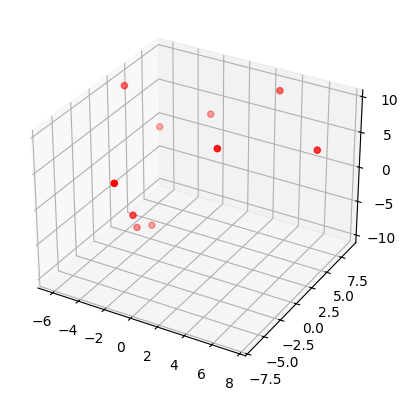

In [150]:
# Create a new figure and a 3D axis for the animation
fig_anim = plt.figure()
ax_anim = fig_anim.add_subplot(111, projection='3d')

# Scatter plot of the points
scatter_anim = ax_anim.scatter(x, y, z, c='r', marker='o')

# Function to update the plot
def update_anim(num, x, y, z):
    theta = num / 100 * 2 * np.pi
    R_x = rotation_matrix_x(theta)
    R_y = rotation_matrix_y(theta)
    R_z = rotation_matrix_z(theta)
    
    rotated_points = [np.dot(R_z, np.dot(R_y, np.dot(R_x, point))) for point in points]
    x_rot, y_rot, z_rot = zip(*rotated_points)
    
    scatter_anim._offsets3d = (x_rot, y_rot, z_rot)
    return scatter_anim

# Create an animation
ani_anim = FuncAnimation(fig_anim, update_anim, frames=10000, fargs=(x, y, z), interval=100)

plt.show()


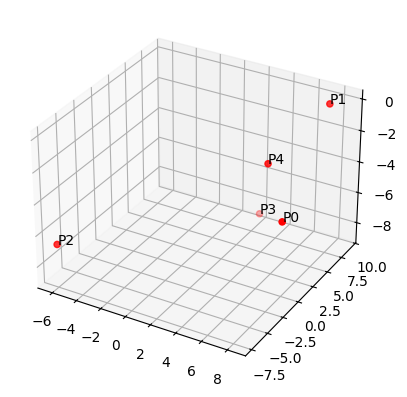

In [151]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 3D 플롯 설정
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 랜덤한 3D 점 생성
points = np.array([(random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(5)])
x, y, z = points.T

# 초기 점 플롯
scatter = ax.scatter(x, y, z, c='r', marker='o')

# 점에 대한 라벨 추가
annotations = [ax.text(x[i], y[i], z[i], f"P{i}", color='black') for i in range(len(points))]

# 회전 행렬 정의
def rotation_matrix_z(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0], 
                     [np.sin(theta), np.cos(theta), 0], 
                     [0, 0, 1]])

# 업데이트 함수
def update(frame):
    theta = np.radians(frame)  # 회전 각도 (degree → radian 변환)
    R = rotation_matrix_z(theta)
    
    # 점 회전
    rotated_points = np.dot(points, R.T)
    x, y, z = rotated_points.T

    # 점 위치 업데이트
    scatter._offsets3d = (x, y, z)
    
    # 라벨 위치 업데이트
    for i, annotation in enumerate(annotations):
        annotation.set_position((x[i], y[i]))
        annotation.set_3d_properties(z[i], zdir='z')

    return ax

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=360, interval=50)

plt.show()